**Unit 3 Report**

Students: Carlos Castro Marín, Karla Torres Parra, Jonathan J. Montes Castro, Germán Álvarez López.

Semester 2023-01

#Gym Environment Description

For this taks/project we use the environment **Mountain Car** from Gymnasium Open AI, a single agent reinforcement learning environment.  This environment challenges an underpowered car to escape the valley between two mountains. The Mountain Car MDP is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill.

As in the documentation from Gym, the core of Gymnasium is *Env* which is a high level python class representing a markov decision process from reinforcement learning theory
It is defined a defines a "game" in which your reinforcement algorithm will compete. An environment does not need to be a game; however, it describes the following game-like features:


*   **action space**: What actions can we take on the environment at each step/episode to alter the environment.
*   **observation space**: What is the current state of the portion of the environment that we can observe. Usually, we can see the entire environment.


Terminology used by this library:

* **Agent**: The machine learning program or model that controls the actions. Step - One round of issuing actions that affect the observation space.
* **Episode**: - A collection of steps that terminates when the agent fails to meet the environment's objective or the episode reaches the maximum number of allowed steps.
* **Render**: - Gym can render one frame for display after each episode.
* **Reward**: - A positive reinforcement that can occur at the end of each episode, after the agent acts.


# Import Dependencies

In [1]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
import gym
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [3]:
pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.3.0
    Uninstalling pygame-2.3.0:
      Successfully uninstalled pygame-2.3.0


We need this packages in order that we can see the live envirioment running in COLAB:

Note: We also leave the .ipynb that can be runned on Jupyter notebook with anaconda, the application by pygame is quite better that here in COLAB.

In [4]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [5]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

# Load Environment

In [6]:
env =  gym.make('MountainCar-v0') #, render_mode='human'

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# Understanding the Environment

Here we can see all the Description of the Mountain Car Environment: https://github.com/openai/gym/blob/master/gym/envs/classic_control/mountain_car.py


The following code describes the Mountian Car environment.

In [7]:
def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Nondeterministic: {spec.nondeterministic}")
    print(f"Reward Range: {env.reward_range}")
    print(f"Reward Threshold: {spec.reward_threshold}")

In [8]:
query_environment("MountainCar-v0")

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0


This environment allows three distinct actions: accelerate forward, decelerate, or backward. The observation space contains two continuous (floating point) values, as evident by the box object. The observation space is simply the position and velocity of the car. The car has 200 steps to escape for each episode. You would have to look at the code, but the mountain car receives no incremental reward. The only reward for the vehicle occurs when it escapes the valley.


In [9]:
env.reset()

array([-0.5026743,  0.       ], dtype=float32)

We can see from here that the initial position is settle randomly. You can run the previous code to see this. Also is important to see that the second argument in the array is the initial speed, taking as 0 by default.

In [10]:
env.action_space

Discrete(3)

In [11]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

#Feature Engineering: Normalizing the configuration space

The observation space of the environment is defined in the position range $[-1.2,0.6]$ in the "x-axis" so to speak. We need to create the Q-table in order to apply Q-learning equation and algorithm in the context of Reinforcement learning being the car the agent in our environment, speed, force and gravity the policies of our environment and the rewards and penalties variables that we defined later. We decide to normalize the position range in order to create a table of 20 x 20 with the following normalization function:

In [12]:
def discretize(value):
    aux = ((value - env.observation_space.low)/(env.observation_space.high-env.observation_space.low))*20
    return tuple(aux.astype(np.int32))

It was neccesary to convert the return vale as tuple in order to gym environment understands this entry value.

In [14]:
discretize(env.reset())

(7, 10)

We can observe that the speed as always is 0 with the normalization is always 10 for the beggining state. In the same way, we can see, running the previous code many times, that the inital state will be between 0 and 20.

Creating the **Q-table**:

In [15]:
q_table = np.random.uniform(low=-1, high=1, size=[20,20,3])

We initialize this Q-table with random variables.

#Environment without Reinforcement Learning

Let's see the car in the environment fixed with a random initial position and following the policies of the environment in a markovian context.

KeyboardInterrupt: ignored

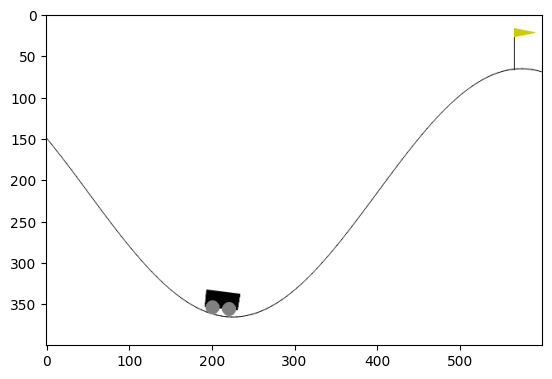

In [14]:
env.reset()
final = False
while not final:
  action = randint(0,2)
  new_state, reward, final, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  env.step(action)
env.close()

#Agent with Reinforcement Learning by Q-learning algorithm

Based on the equation:

\begin{equation}
Q_{new}(s,a)= Q(s,a) + \alpha[R(s,a)+\gamma maxQ'(s',a')- Q(s,a)]
\end{equation}

And using the Q-table for each state in the position state with its respectively action we define the learning rate, the discount factor for which we choosed a value for a reward in the long run.

Also we defined 5000 episodes (epocs in the coding) the times that the game is trained, we set our code that shows us each 500 time that the game is played. It is important to point out that our states are discretized by the function previously defined in this notebook in order to have a normalization and discretization of the configuration space in terms of the space in the "x-axis". Also our reward, being the metric in our code will be added in a list for each episode (epoc). 

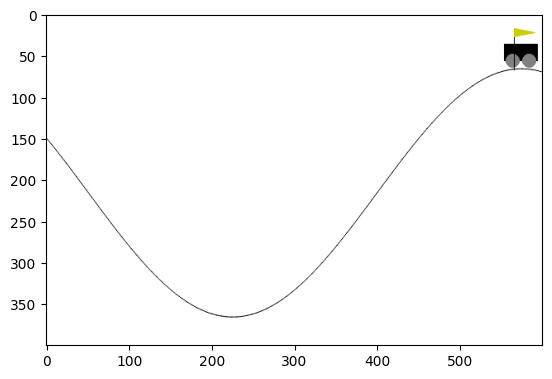

Episode: 500 - Reward: -96.15523492337852


KeyboardInterrupt: ignored

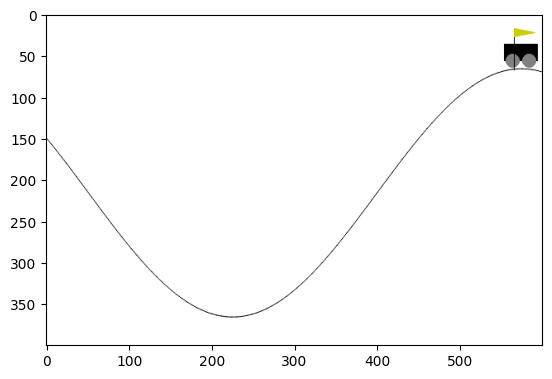

In [21]:
learning_rate = 0.1
disc_fact= 0.95
epocs = 2500
reward_list = []
for epocs in range (epocs):
    state = discretize(env.reset())
    final = False
    Total_reward = 0
    while not final:
        if randint(0,10)>2:
            action = np.argmax(q_table[state])
        else:
            action = randint(0,2)
        new_state, reward, final , info = env.step(action)
        q_table[state][action] = q_table[state][action] + learning_rate * (reward + disc_fact*np.max(q_table[discretize(new_state)])-q_table[state][action])
        state = discretize(new_state)
        Total_reward += reward
        if (epocs+1)%500 == 0:
            screen = env.render(mode='rgb_array')
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            env.step(action)
        reward_list.append(Total_reward)
    if (epocs+1)%100 == 0:
        print(f"Episode: {epocs+1} - Reward: {np.mean(reward_list)}")
    env.close()

In [22]:
print(f"Episode: {epocs+1} - Reward: {np.mean(reward_list)}")

Episode: 584 - Reward: -96.20609585644078
